# 240217: In Class Group Work 
- Import relevant python libraries.
- Import the CSV file – NSMES1988new.csv into a dataframe and enforce the dtypes recommended in step 9 of Week 1.
- Perform the following operations on age and income columns. Multiply Age by 10 and income by 10000.
- Perform basic statistical analysis on the new dataframe and generate a brief report on the outcome.  
Aggregations:
- total visits by gender
- average income by health
- average visit by region
- Invoke describe command on the dataframe and compare that with the basic statistical analysis done in the previous step, and report.
- build a scatterplot for income vs age

## Import relevant python libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib 
import seaborn as sns

C:\Users\chand\AppData\Local\Temp\ipykernel_45472\545415830.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Import the CSV file – NSMES1988new.csv into a dataframe and enforce the dtypes recommended in step 9 of Week 1.


In [6]:
df = pd.read_csv('NSMES1988.csv')

In [7]:
numerical_cols = df.select_dtypes('int').columns
print(numerical_cols)

Index(['Unnamed: 0', 'visits', 'nvisits', 'ovisits', 'novisits', 'emergency',
       'hospital', 'chronic', 'school'],
      dtype='object')


Perform the following operations on age and income columns. Multiply Age by 10 and income by 10000.

In [8]:
df['age10'] = df['age']*10
df['income10'] = df['income']*10000

In [9]:
#dtypes 
df[numerical_cols] = df[numerical_cols].astype('int16')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4406 non-null   int16  
 1   visits      4406 non-null   int16  
 2   nvisits     4406 non-null   int16  
 3   ovisits     4406 non-null   int16  
 4   novisits    4406 non-null   int16  
 5   emergency   4406 non-null   int16  
 6   hospital    4406 non-null   int16  
 7   health      4406 non-null   object 
 8   chronic     4406 non-null   int16  
 9   adl         4406 non-null   object 
 10  region      4406 non-null   object 
 11  age         4406 non-null   float64
 12  afam        4406 non-null   object 
 13  gender      4406 non-null   object 
 14  married     4406 non-null   object 
 15  school      4406 non-null   int16  
 16  income      4406 non-null   float64
 17  employed    4406 non-null   object 
 18  insurance   4406 non-null   object 
 19  medicaid    4406 non-null  

Perform basic statistical analysis on the new dataframe and generate a brief report on the outcome.  

Aggregations:
- total visits by gender
- average income by health
- average visit by region

In [10]:
df.groupby('gender').agg({'visits':'sum'})

,visits
gender,
female,15805
male,9637


In [11]:
df.groupby('health').agg({'income10':'mean'})

,income10
health,
average,25519.896449
excellent,32774.114577
poor,19051.624621


In [12]:
df.groupby('region').agg({'visits':'mean'})

,visits
region,
midwest,5.408816
northeast,6.091995
other,5.578067
west,6.368421


Invoke describe command on the dataframe and compare that with the basic statistical analysis done in the previous step, and report.
- Average visits by region 
    - Average visits 5.78 in data set 
    - West and northeast has higher average of visits than the average 
- Average incom


In [13]:
df.describe()

,Unnamed: 0,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income,age10,income10
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,2203.500000,5.774399,1.618021,0.750794,0.536087,0.263504,0.295960,1.541988,7.402406,10.290286,2.527132,74.024058,25271.320468
std,1272.046972,6.759225,5.317056,3.652759,3.879506,0.703659,0.746398,1.349632,0.633405,3.738736,2.924648,6.334050,29246.476178
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.600000,0.000000,-1.012500,66.000000,-10125.000000
25%,1102.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.900000,8.000000,0.912150,69.000000,9121.500000
50%,2203.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.300000,11.000000,1.698150,73.000000,16981.500000
75%,3304.750000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,7.800000,12.000000,3.172850,78.000000,31728.500000
max,4406.000000,89.000000,104.000000,141.000000,155.000000,12.000000,8.000000,8.000000,10.900000,18.000000,54.835100,109.000000,548351.000000


build a scatterplot for income vs age

<Axes: xlabel='age10', ylabel='income10'>

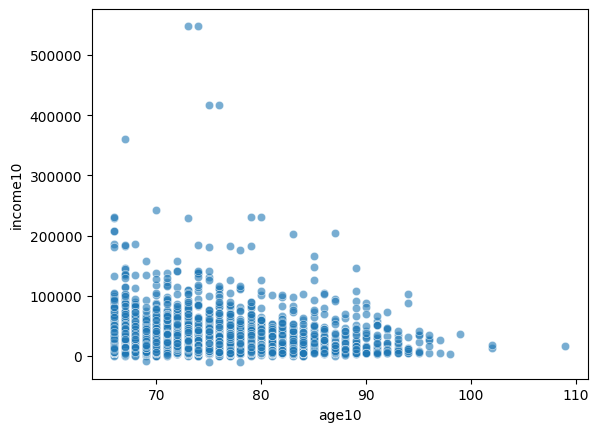

In [17]:
sns.scatterplot(x=df['age10'],y=df['income10'],alpha=0.6)

In [18]:
df[['income10','age10']].corr()
#the correlation is -0.07, which is very weakly correlated. Run a statistical test to see if this is significantly different from no correlation 

,income10,age10
income10,1.00000,-0.07313
age10,-0.07313,1.00000
